# CODEATHON 2: Recognizing UVA landmarks with neural nets (50 pts)
![UVA Grounds](https://giving.virginia.edu/sites/default/files/2019-02/jgi-teaser-image.jpg)

The UVA Grounds is known for its Jeffersonian architecture and place in U.S. history as a model for college and university campuses throughout the country. Throughout its history, the University of Virginia has won praises for its unique Jeffersonian architecture.

In this codeathon, you will attempt the build an image recognition system to classify different buildlings/landmarks on Grounds. You will earn 50 points for this codeathon plus 10 bonus points. To make it easier for you, some codes have been provided to help you process the data, you may modify it to fit your needs. You must submit the .ipynb file via UVA Collab with the following format: yourcomputingID_codeathon_2.ipynb

In [2]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

2023-11-13 22:06:19.936123: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 22:06:19.965604: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 22:06:19.965628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 22:06:19.965650: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 22:06:19.971000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 22:06:19.972110: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
#tf.debugging.set_log_device_placement(True)

# Step 2: Process the  Dataset
The full dataset is huge (+37GB) with +13K images of 18 classes. So it will take a while to download, extract, and process. To save you time and effort, a subset of the data has been resized and compressed to only 379Mb and stored in my Firebase server. This dataset will be the one you will benchmark for your grade. If you are up for a challenge (and perhaps bonus points), contact the instructor for the full dataset!

In [5]:
from sklearn.datasets import load_files
#from keras.utils import np_utils

from keras.preprocessing import image
#from tqdm import tqdm # progress bar

data_dir = "./dataset"
batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 150;
img_width = 150;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 14286 files belonging to 18 classes.
Using 11429 files for training.


2023-11-13 22:06:41.481740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 22:06:41.482069: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Found 14286 files belonging to 18 classes.
Using 2857 files for validation.


In [6]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

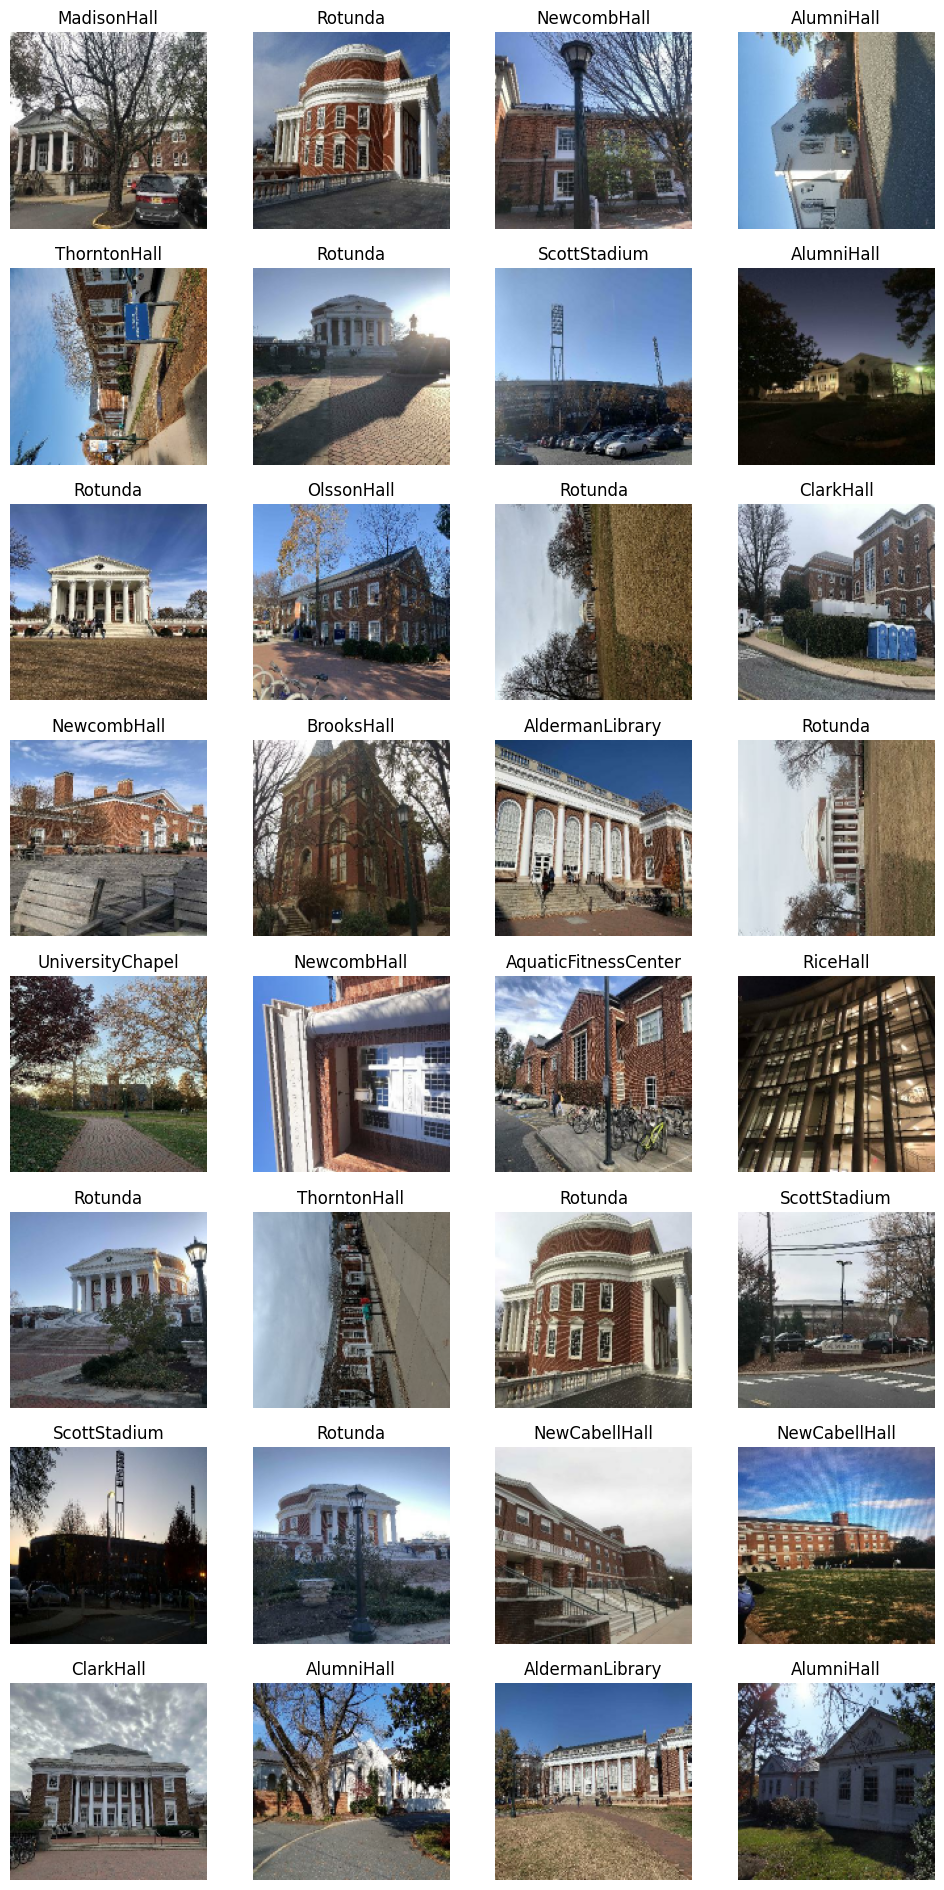

In [7]:
# Visualize some of the train samples of one batch
# Make sure you create the class names that match the order of their appearances in the "files" variable
class_names = ['AcademicalVillage', 'AldermanLibrary', 'AlumniHall', 'AquaticFitnessCenter',
  'BavaroHall', 'BrooksHall', 'ClarkHall', 'MadisonHall', 'MinorHall', 'NewCabellHall',
  'NewcombHall', 'OldCabellHall', 'OlssonHall', 'RiceHall', 'Rotunda', 'ScottStadium',
  'ThorntonHall', 'UniversityChapel']

# Rows and columns are set to fit one training batch (32)
n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)


Images shape: (32, 150, 150, 3)
Labels: tf.Tensor(
[10  6 15 13 17 17 11  6  8 15 16  3 13  2  7  5 16 16 16 14  1 11  3  2
 11  0  6  0 10 10  6  6], shape=(32,), dtype=int32)
First image label: NewcombHall


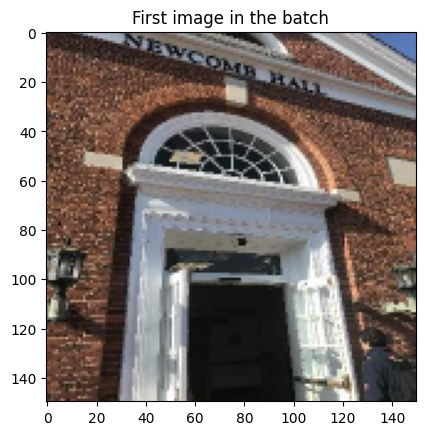

In [8]:
# Take one batch from the dataset
for images, labels in train_ds.take(1):
    print("Images shape:", images.shape)
    print("Labels:", labels)

    # If you want to display the label of the first image in the batch
    print("First image label:", class_names[labels[0]])

    # Optional: If you want to visualize the first image
    import matplotlib.pyplot as plt
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title("First image in the batch")
    plt.show()

In [9]:
# YOUR CODE STARTS HERE

# Step 3: Create your own CNN architecture
You must design your own architecture. To get started, you may get inspiration from one in CNN notebook  (i.e. use one similar to LeNet-5 or AlexNet). You will have to report the design of the architecture:

1.   How many layers does it have?
2.   Why do you decide on a certain number nodes per layer?
3.   Which activation functions do you choose?
4.   How many parameters does it has in total?

Hint: use `myModel.summary()` to learn on the layers and parameters




In [95]:
# Your code here
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes=18

myModel  = keras.models.Sequential([
    
    #first convolutional layer:
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2,2)),

    #second convolutional layer, more kernels:
    Conv2D(64, kernel_size=(4,4), activation="relu"),
    MaxPooling2D(pool_size=(3,3)),

    #third convolution layer, MORE KERNELS:
    Conv2D(128, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(3,3)),
    
    #Flatten layers to pass into dense network:
    Flatten(), 
    
    #first fully connected layer:
    Dense(128, activation="relu"),
    Dropout(0.25),

    #second fully connected layer:
    Dense(64, activation="relu"),
    Dropout(0.25),

    Dense(32, activation="relu"),
    Dropout(.25),
    #final layer, 18 outputs, activation=softmax:
    Dense(num_classes, activation="softmax")
    ])

myModel.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 71, 71, 64)        32832     
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 7, 7, 128)       

After designing the model, you will need to train it. In order to train, you will need to pick a number of `epoch` (iteration), which `optimizer` to use (from  `keras.optimizers`), a `loss` function, and some `metrics`.

In [96]:
myEpochs = 15
myOptimizer = "adam"
myLoss = "sparse_categorical_crossentropy"
myMetrics = ["accuracy"]
myModel.compile(loss= myLoss, optimizer=myOptimizer, metrics=myMetrics)

history = myModel.fit(train_ds,
                      validation_data=validation_ds,
                      epochs = myEpochs)

Epoch 1/15
358/358 [==============================] - 125s 347ms/step - loss: 3.1984 - accuracy: 0.1046 - val_loss: 2.7766 - val_accuracy: 0.1190
Epoch 2/15
358/358 [==============================] - 123s 343ms/step - loss: 2.7322 - accuracy: 0.1573 - val_loss: 2.6014 - val_accuracy: 0.1876
Epoch 3/15
358/358 [==============================] - 122s 342ms/step - loss: 2.5715 - accuracy: 0.2029 - val_loss: 2.3574 - val_accuracy: 0.2636
Epoch 4/15
358/358 [==============================] - 122s 342ms/step - loss: 2.3984 - accuracy: 0.2603 - val_loss: 2.1792 - val_accuracy: 0.3238
Epoch 5/15
358/358 [==============================] - 127s 356ms/step - loss: 2.2296 - accuracy: 0.3145 - val_loss: 2.0069 - val_accuracy: 0.3934
Epoch 6/15
358/358 [==============================] - 122s 342ms/step - loss: 2.0640 - accuracy: 0.3701 - val_loss: 1.8550 - val_accuracy: 0.4484
Epoch 7/15
358/358 [==============================] - 122s 342ms/step - loss: 1.9312 - accuracy: 0.4118 - val_loss: 1.7711 -

Next, you need to create (1) a plot of training and validation `loss` and (2) a plot of training and validation `accuracy`. These plots might give you some insights about your model performance and possibility of overfitting.

Report the performance of your architecture on the validation set in a `confusion matrix`. Make comments on the performance by answering the following questiosns:
- How well do you think your architecture is doing (overall accuracy)?
- Where did it makes mistake most?
- Which classes can be improved?

In [253]:
#workaround to getting valid predictions, takes longer but works:

predictions = []
actual_values = []

for image, label in validation_ds:
    batch_predictions = myModel.predict(image)
    predictions.extend(batch_predictions)
    actual_values.extend(label.numpy())


predictions = np.array(predictions)
predictions = np.argmax(predictions, axis=1)

clear_output()

In [254]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(actual_values, predictions)


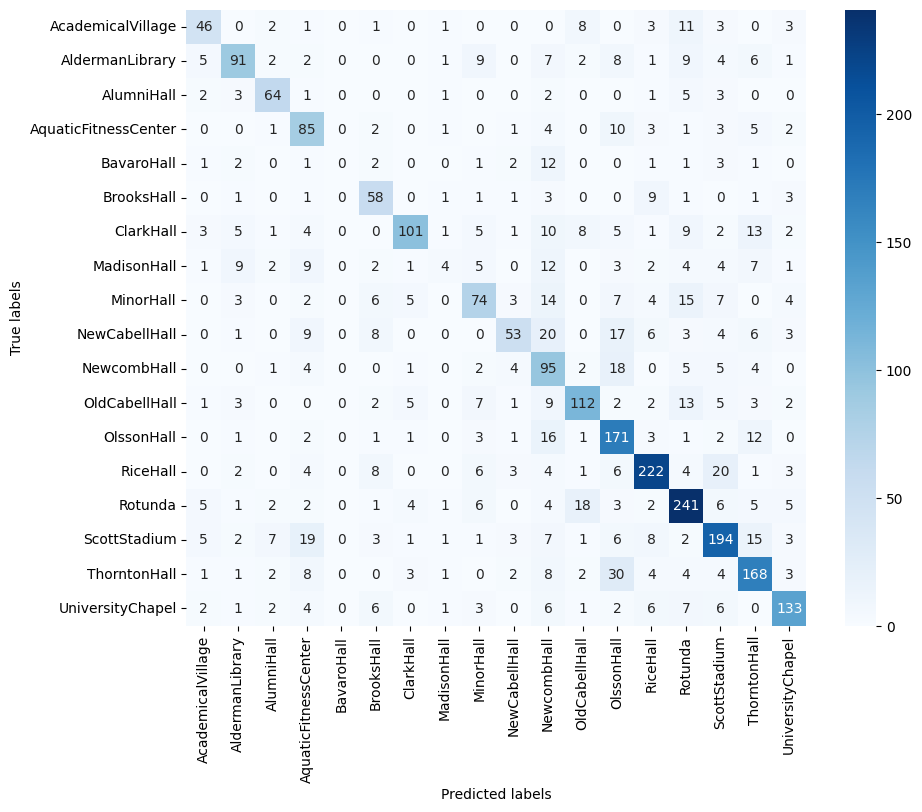

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [256]:
"""
Overall Architecture Performance: 

    Definitely can't complain with this performance, the clean diagonal line of accurate class predictions is ideal, though we definitely have some classes struggling.

Most Mistakes:

    We had large quantities of mistakes in classes like Olsson Hall and the AFC having 30 and 19 false positives respectively. This model is still performing relatively well though so I can't complain. 

Classes to be Improved:

    Classes to improve include: ['Olsson Hall', 'ScottStadium', 'AquaticFitnessCenter', 'NewcombHall']. Others are also struggling but these have the most false positives of any of the classes.

"""

from IPython.display import clear_output

clear_output()

# Step 4: Use a Pre-trained Network with Transfer Learning
Now that you have a your own custom model and some baseline performance, let's see if you can improve the performance using transfer learning and a pre-trained model. You may use any pre-trained model EXCEPT ones that already provided such as `Xception`, `MobileNet`, `EfficientNetB6`. Keep in mind that each pre-trained model may expect a different input shape, so adjust the size of your training images accordingly.

Make sure you report the design of this architecture by answer the same questions 1-4 in Step 3.

Hint: use `ImageNet` as weights when load the pre-train network, then add a `GlobalAveragePooling2D` and an output layer with `softmax` activation.



In [105]:
# Your code here

from tensorflow.keras.applications import ResNet50


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

94765736/94765736 [==============================] - 4s 0us/step


Next, you will attempt to adapt this pre-trained model to your UVA Landmark dataset. It is recommended that you tried the two-phase training approach for your model:

1.   Phase 1: Freeze the pre-train weights and only train the top layer
2.   Phase 2: Train the entire network with much smaller learning rate (adapt the model to UVA data, but avoid destroying the transfered weights).



In [106]:
# Phase 1 code here
for layer in base_model.layers:
    layer.trainable = False

In [274]:
# Phase 2 code here

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Reshape

num_classes=18

myTransferModel = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    #my dense layers to learn specific UVA image relationships
    Dense(num_classes, activation="softmax")
])

myTransferModel.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_142 (Dense)           (None, 18)                36882     
                                                                 
Total params: 23624594 (90.12 MB)
Trainable params: 36882 (144.07 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [275]:
#Compile and train model:

myEpochs = 7
myOptimizer = "adam"
myLoss = "sparse_categorical_crossentropy"
myMetrics = ["accuracy"]
myTransferModel.compile(loss= myLoss, optimizer=myOptimizer, metrics=myMetrics)


history = myTransferModel.fit(train_ds,
                             validation_data=validation_ds,
                             epochs=myEpochs)

Epoch 1/7
358/358 [==============================] - 277s 759ms/step - loss: 1.3150 - accuracy: 0.6241 - val_loss: 0.8879 - val_accuracy: 0.7571
Epoch 2/7
358/358 [==============================] - 271s 759ms/step - loss: 0.6968 - accuracy: 0.8076 - val_loss: 0.7291 - val_accuracy: 0.7938
Epoch 3/7
358/358 [==============================] - 265s 740ms/step - loss: 0.5163 - accuracy: 0.8614 - val_loss: 0.6487 - val_accuracy: 0.8236
Epoch 4/7
358/358 [==============================] - 266s 744ms/step - loss: 0.4126 - accuracy: 0.8944 - val_loss: 0.6346 - val_accuracy: 0.8208
Epoch 5/7
358/358 [==============================] - 270s 754ms/step - loss: 0.3451 - accuracy: 0.9136 - val_loss: 0.5964 - val_accuracy: 0.8341
Epoch 6/7
358/358 [==============================] - 262s 732ms/step - loss: 0.2882 - accuracy: 0.9311 - val_loss: 0.5833 - val_accuracy: 0.8386
Epoch 7/7
358/358 [==============================] - 266s 743ms/step - loss: 0.2446 - accuracy: 0.9459 - val_loss: 0.5735 - val_ac

In [276]:
#workaround to getting valid predictions, takes longer but works:

transfer_predictions = []
actual_values = []

for image, label in validation_ds:
    batch_predictions = myTransferModel.predict(image)
    transfer_predictions.extend(batch_predictions)
    actual_values.extend(label.numpy())


transfer_predictions = np.array(transfer_predictions)
transfer_predictions = np.argmax(transfer_predictions, axis=1)

clear_output()

In [277]:
#Can reuse true classes from my custom model
conf_matrix_transfer = confusion_matrix(actual_values , transfer_predictions)

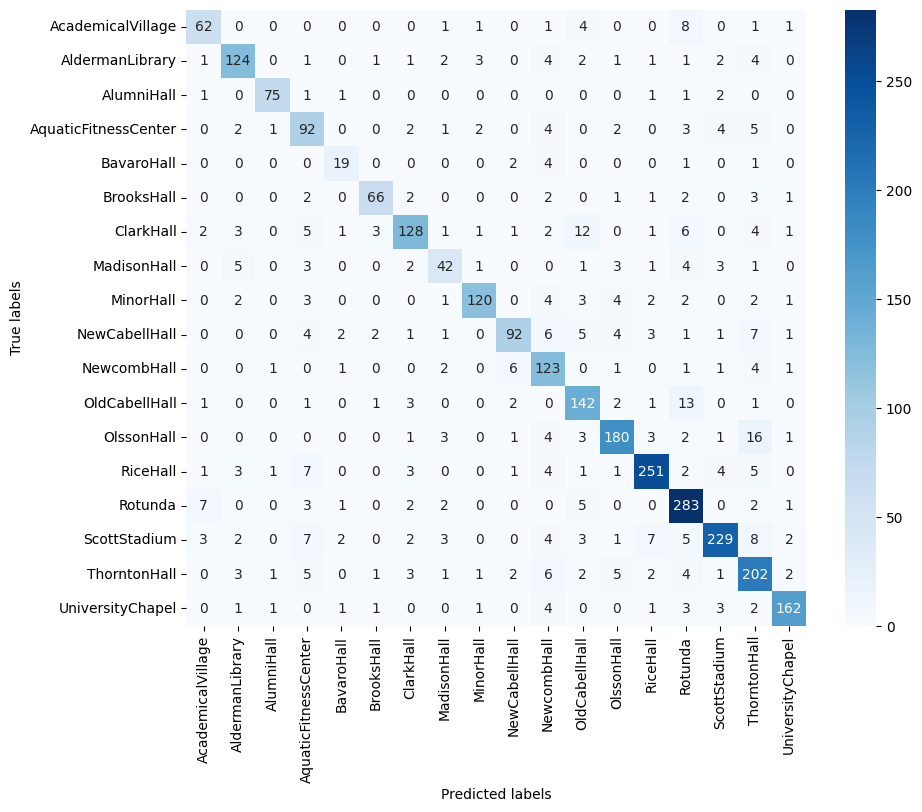

In [278]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_transfer, annot=True, fmt='g', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Repeat the same reporting of performance using the confusion matrix:
- Did this pre-trained network do better overall?
- In which class it improve the accuracy from the above model?
- Which class still has low performance?

Typically, your network must have a reasonable performance of at least 84% overall accuracy to be considered successful in this domain. If your network achieves a accuracy of 94% or above on the validation set, you will also recieve a 10 bonus points, so keep trying!

In [279]:
"""
Overall:

    This model did significantly better overall taking the validation accuracy from around 65% to a nice 85% that is significantly more accurate!

Most Improved: 

    The most improved classes are probably Olsson Hall the AFC which have both dramatically reduced the number of obvious false positives. Olsson and Old Cabell now have some of the only large quantities
    of false positives with 17 and 16 respectivelt. Almost all other images are relatively accurate overall. 

Low Performance: 

    Though the most improved, I would continue to say that the worst performing classes are Olsson, Old Cabell, and thr Academical Village. Overall though, this error level is still very much within 
    reason and improvement upon this would be for convenience and the desire for maximized model performance.


"""
clear_output()

# Step 5: Reflection

Write at least a paragraph answering these prompts: How did your own network perform in comparison to the pre-trained one? What are the major differences between the architectures? Additionally, report on your experience implementing different models for this assignment (Was it hard/easy/fun?, from which part did you learn the most?)!

In [280]:
"""
Compared to the pre-trained model, my custom model was still quite formidable, but lacking the massive parameter space of the imagenet base, I was unable to get a performance rating much above about 
65-70%. This is still impressive though considering my model is significantly less complex and trains in dramatically more quickly. ResNet50 is composed of 50 total layers with 48 convolutional layers
and 2 fully connected layers with pooling and sampling layers littered inbetween. This model is dramatically more complex than my simple 6 layer DNN with 3 convolutional layers and 3 fully connected layers.
This shows that complexity in some cases can certainly buy you performance, but simple models can also find very sophisticated relationships in the data regardless. Implementing these models was really fun!
Tensorflow and Keras allow for a very seamless and enjoyable development experience that I could easily recommend to anybody curious about exploring AI and Machine Learning. Playing around and modifying 
my neural network by adding and removing layers is definitely where I learned the most. Making the layers arbitrarily complex and adding needless nodes did not simply improve the model everytime. Though 
this seems obvious now, at the time it certainly challende by intuition that complexity = performance. This exersize has definitely increased my interest in developing my own CNN's/ANN in general!
"""

"\nCompared to the pre-trained model, my custom model was still quite formidable, but lacking the massive parameter space of the imagenet base, I was unable to get a performance rating much above about \n65-70%. This is still impressive though considering my model is significantly less complex and trains in dramatically more quickly. ResNet50 is composed of 50 total layers with 48 convolutional layers\nand 2 fully connected layers with pooling and sampling layers littered inbetween. This model is dramatically more complex than my simple 6 layer DNN with 3 convolutional layers and 3 fully connected layers.\nThis shows that complexity in some cases can certainly buy you performance, but simple models can also find very sophisticated relationships in the data regardless. Implementing these models was really fun!\nTensorflow and Keras allow for a very seamless and enjoyable development experience that I could easily recommend to anybody curious about exploring AI and Machine Learning. Play